In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pymol import cmd, CmdException
from matplotlib import cm

import os,time


# Define function to calculate secondary structure percentage
def calc_ss_percent(ss_string):
    Helix_len = 0
    Sheet_len = 0
    LoopR_len = 0

    for i in range(len(ss_string)):
        if ss_string[i] == 'H':
            Helix_len += 1
        elif ss_string[i] == 'S':
            Sheet_len += 1
        elif ss_string[i] == 'L':
            LoopR_len += 1
        else:
            return BaseException
    return Helix_len/len(ss_string),Sheet_len/len(ss_string),LoopR_len/len(ss_string)



In [2]:
# load dataframes
df_A501 = pd.read_csv("A501_results.csv")
df_3DAC = pd.read_csv("3DAC_results.csv")


In [3]:
# check head files
df_A501.head()

,ID,name,old_name,sequence,sequence length,model_1_plddt,model_2_plddt,disulfide_bond,hydrogen_bond,salt_bridge,surface,SASA,secondary_structure
0,A501_1,WP_011250482.1,A501_001,MAKKGAGATRGISPVRPTRALPIGAYLKVADNSGAKVIQIIGVVGY...,141.0,90.681015,90.474789,0.0,121.0,2.0,16448.00586,8913.55957,LLLLLLLLLLLLLLLLLLLLLLLSSSSSSLLLLLLSSSSSSSSLLL...
1,A501_2,WP_042692804.1,A501_002,MGKSLIQQRRGKGTTTFRAPSHRYRGAVKYVPLNVVKEKTLRGVVE...,239.0,94.120890,93.913161,0.0,183.0,2.0,28280.49805,16099.31055,LLLLLHHHHHHHLLHHHLLLHHHLLLLLLLLLHHHHLLLLSSSSSS...
2,A501_3,WP_042693005.1,A501_003,MKVVRFGVSVPEELLEKFDRIIEEKGYVNRSEAIRDLMRDFIIRHE...,138.0,95.654313,95.708373,0.0,146.0,5.0,16841.46875,10151.21777,LLLLLLLLLLLHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHH...
3,A501_4,WP_050001839.1,A501_004,MDCTKDYCVKDLSLATSGEKKIDWVSRFMPVLQTIRREFEREKPFK...,421.0,96.819289,96.925328,1.0,523.0,19.0,49283.14063,19119.72852,LSSSLLSSSLLHHHHHHHHHHHHHHHHHLHHHHHHHHHHHHHLLLL...
4,A501_5,WP_050001842.1,A501_005,MRRDYTLYLFASLGSFLIAYIALPLVIIFAKQLMDWEMLVKTLHDP...,247.0,95.500631,95.463742,0.0,316.0,3.0,28950.64258,15324.12012,LLLLHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHLHHHHHHHHHLH...


In [4]:
# Calculate secondary structure percentage for A501
ss_H_list = []
ss_S_list = []
ss_L_list = []
for i in range(df_A501.shape[0]):
    if pd.notnull(df_A501["secondary_structure"][i]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_A501["secondary_structure"][i])
    else:
        ss_H,ss_S,ss_L = None,None,None
    ss_H_list.append(ss_H)
    ss_S_list.append(ss_S)
    ss_L_list.append(ss_L)
df_A501["ss_H"] = ss_H_list
df_A501["ss_S"] = ss_S_list
df_A501["ss_L"] = ss_L_list

# Calculate secondary structure percentage for 3DAC
ss_H_list = []
ss_S_list = []
ss_L_list = []
for i in range(df_3DAC.shape[0]):
    if pd.notnull(df_3DAC["secondary_structure"][i]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_3DAC["secondary_structure"][i])
    else:
        ss_H,ss_S,ss_L = None,None,None
    ss_H_list.append(ss_H)
    ss_S_list.append(ss_S)
    ss_L_list.append(ss_L)
df_3DAC["ss_H"] = ss_H_list
df_3DAC["ss_S"] = ss_S_list
df_3DAC["ss_L"] = ss_L_list

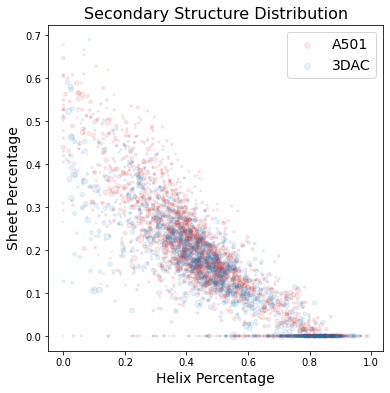

In [5]:
plt.figure(figsize=(6,6))
plt.title("Secondary Structure Distribution",fontsize=16)
plt.scatter(df_A501[df_A501["ss_H"].notnull()]["ss_H"],df_A501[df_A501["ss_S"].notnull()]["ss_S"],s=df_A501[df_A501["sequence length"].notnull()]["sequence length"]/30,alpha=0.1,color="tab:red" ,label="A501")
plt.scatter(df_3DAC[df_3DAC["ss_H"].notnull()]["ss_H"],df_3DAC[df_3DAC["ss_S"].notnull()]["ss_S"],s=df_3DAC[df_3DAC["sequence length"].notnull()]["sequence length"]/30,alpha=0.1,color="tab:blue",label="3DAC")
plt.xlabel("Helix Percentage",fontsize=14)
plt.ylabel("Sheet Percentage",fontsize=14)
plt.legend(fontsize=14)
plt.savefig("Figure/SS.pdf")
plt.savefig("Figure/SS.png")

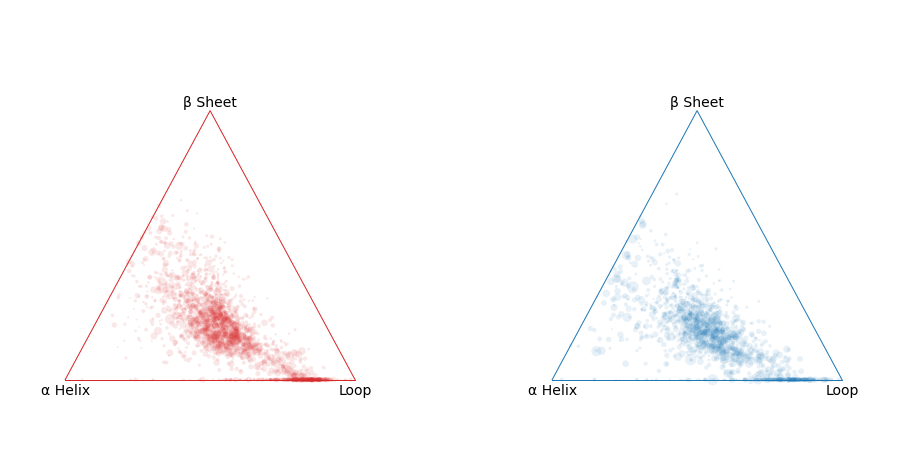

In [6]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.scatter(df_A501[df_A501["ss_H"].notnull()]["ss_H"]+df_A501[df_A501["ss_S"].notnull()]["ss_S"]/2,df_A501[df_A501["ss_S"].notnull()]["ss_S"]/2*np.sqrt(3),s=df_A501[df_A501["sequence length"].notnull()]["sequence length"]/15,edgecolor="None",alpha=0.1,color="tab:red" ,label="A501")
plt.xlabel("Helix Percentage",fontsize=14)
plt.ylabel("Sheet Percentage",fontsize=14)
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
plt.plot([0,1],[0,0],c="tab:red",linewidth=1)
plt.plot([0,1/2,1],[0,np.sqrt(3)/2,0],c="tab:red",linewidth=1)
plt.text(0,-0.05,"α Helix",ha="center",fontsize=14)
plt.text(1,-0.05,"Loop",ha="center",fontsize=14)
plt.text(0.5,0.88,"β Sheet",ha="center",fontsize=14)
plt.axis('off')

plt.subplot(122)
plt.scatter(df_3DAC[df_3DAC["ss_H"].notnull()]["ss_H"]+df_3DAC[df_3DAC["ss_S"].notnull()]["ss_S"]/2,df_3DAC[df_3DAC["ss_S"].notnull()]["ss_S"]/2*np.sqrt(3),s=df_3DAC[df_3DAC["sequence length"].notnull()]["sequence length"]/15,edgecolor="None",alpha=0.1,color="tab:blue",label="3DAC")
plt.xlabel("Helix Percentage",fontsize=14)
plt.ylabel("Sheet Percentage",fontsize=14)
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
plt.plot([0,1],[0,0],c="tab:blue",linewidth=1)
plt.plot([0,1/2,1],[0,np.sqrt(3)/2,0],c="tab:blue",linewidth=1)
plt.text(0,-0.05,"α Helix",ha="center",fontsize=14)
plt.text(1,-0.05,"Loop",ha="center",fontsize=14)
plt.text(0.5,0.88,"β Sheet",ha="center",fontsize=14)
plt.axis('off')

plt.savefig("Figure/SS_triangle.pdf")
plt.savefig("Figure/SS_triangle.png")